In [7]:
%matplotlib inline
import seaborn as sns
import matplotlib as plt
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

#file location
filename = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"

#defining the headers
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

#importing dataframe to Python
df = pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv", names = headers)

#replacing '?' for NaN, in missing position
df.replace("?", np.nan, inplace = True)

#identifying missing data using boolean count of True or False.
missing_data = df.isnull()

#finding out the number of missing data using for loop 
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  
df['horsepower']
df

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [8]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

# Basic data cleaning

symboling               int64
normalized-losses       int32
make                   object
num-of-doors           object
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type            object
num-of-cylinders       object
engine-size             int64
fuel-system            object
bore                  float64
stroke                float64
compression-ratio     float64
horsepower              int32
peak-rpm              float64
city-mpg                int64
highway-mpg             int64
price                 float64
city-L/100KM          float64
highway-L/100KM       float64
std                     uint8
turbo                   uint8
diesel                  uint8
gas                     uint8
horsepower-binned    category
dtype: object

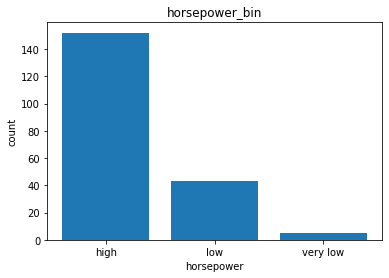

In [9]:
#replaces the missing values with the normalized value, here we consider the mean   

avg_norm_losses = df['normalized-losses'].astype('float').mean(axis=0)
df['normalized-losses'].replace(np.nan, avg_norm_losses, inplace=True)


df['num-of-doors'].value_counts()
#df['num-of-doors'].value_counts().idmax()
df["num-of-doors"].replace(np.nan, "four", inplace=True)


avg_bore = df['bore'].astype('float').mean(axis=0)
df['bore'].replace(np.nan, avg_bore, inplace=True)


avg_stroke = df['stroke'].astype('float').mean(axis=0)
df['stroke'].replace(np.nan, avg_stroke, inplace=True)


avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)


avg_peakRPM = df['peak-rpm'].astype('float').mean(axis=0)
df['peak-rpm'].replace(np.nan, avg_peakRPM, inplace=True)


#finally we drop all of the rows whose corresponding price values are missing
df.dropna(subset=['price'], axis=0, inplace=True)

#reset index because we drop rows
df.reset_index(drop=True, inplace=True)

    
#now we correct the data type
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")
df[["horsepower"]] = df[["horsepower"]].astype("int")


# data standarization 
df["city-L/100KM"] = 235/df["city-mpg"]
df["highway-L/100KM"] = 235/df["highway-mpg"] 
df.rename(columns={'"highway-mpg"':'highway-L/100km'}, inplace=True)
df
    

#data normalization
#here we normalize length, width and height

#method: Simple feature scaling, x_new = x_old / x_max
df["length"] = df["length"]/df["length"].max()
df["width"] = df["width"]/df["width"].max()
df["height"] = df["height"]/df["height"].max()


#creating dummy variable for "aspiration"
dummy_variable_1 = pd.get_dummies(df["aspiration"])
dummy_variable_1.rename(columns={'aspiration':'std', 'aspiration':'turbo'}, inplace=True)

# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "aspiration" from "df"
df.drop("aspiration", axis = 1, inplace=True)


#creating dummy variable for "fuel-type"
dummy_variable_2 = pd.get_dummies(df["fuel-type"])
dummy_variable_2.rename(columns={'fuel-type':'gas', 'fuel-type':'diesel'}, inplace=True)

# merge data frame "df" and "dummy_variable_2" 
df = pd.concat([df, dummy_variable_2], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)



#plt.pyplot.hist(df["horsepower"])

plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower_bin")

bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
group_names = ["high","low","very low"]

df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=False )
df[['horsepower','horsepower-binned']].head()

df["horsepower-binned"].value_counts()

pyplot.bar(group_names, df["horsepower-binned"].value_counts())


df.dtypes

In [11]:
# our clean dataframe is as below:
df

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,highway-mpg,price,city-L/100KM,highway-L/100KM,std,turbo,diesel,gas,horsepower-binned
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,13495.0,11.190476,8.703704,1,0,0,1,high
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,16500.0,11.190476,8.703704,1,0,0,1,high
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,19,26,16500.0,12.368421,9.038462,1,0,0,1,low
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,24,30,13950.0,9.791667,7.833333,1,0,0,1,high
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,18,22,17450.0,13.055556,10.681818,1,0,0,1,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,0.956944,...,23,28,16845.0,10.217391,8.392857,1,0,0,1,high
197,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,0.955556,...,19,25,19045.0,12.368421,9.400000,0,1,0,1,low
198,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,0.956944,...,18,23,21485.0,13.055556,10.217391,1,0,0,1,low
199,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,0.956944,...,26,27,22470.0,9.038462,8.703704,0,1,1,0,high


In [12]:
#pivot table

df_test = df[['drive-wheels','body-style','price']]
df_grp = df_test.groupby(['drive-wheels','body-style'], as_index=False).mean()
df_pivot = df_grp.pivot(index='drive-wheels', columns='body-style')
print(df_grp)
df_pivot

   drive-wheels   body-style         price
0           4wd    hatchback   7603.000000
1           4wd        sedan  12647.333333
2           4wd        wagon   9095.750000
3           fwd  convertible  11595.000000
4           fwd      hardtop   8249.000000
5           fwd    hatchback   8396.387755
6           fwd        sedan   9811.800000
7           fwd        wagon   9997.333333
8           rwd  convertible  23949.600000
9           rwd      hardtop  24202.714286
10          rwd    hatchback  14337.777778
11          rwd        sedan  21711.833333
12          rwd        wagon  16994.222222


price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

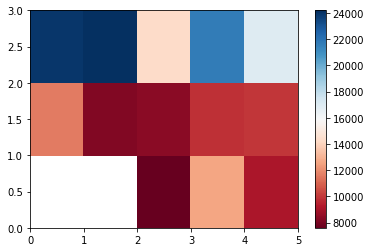

In [13]:
#heat diagram

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import pyplot
plt.pcolor(df_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

Text(0, 0.5, 'price')

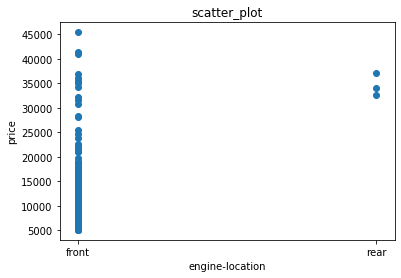

In [14]:
#scatter plot
#engine location vs price
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import pyplot
x=df["engine-location"]
y=df["price"]
plt.scatter(x,y)
plt.title('scatter_plot')
plt.xlabel('engine-location')
plt.ylabel('price')

Text(0, 0.5, 'price')

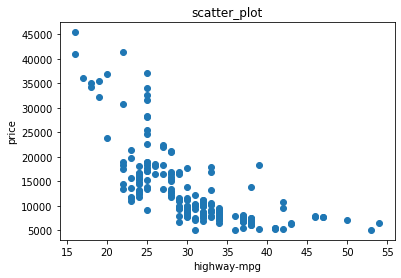

In [15]:
#scatter plot
#highway-mpg vs price
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import pyplot
x=df["highway-mpg"]
y=df["price"]
plt.scatter(x,y)
plt.title('scatter_plot')
plt.xlabel('highway-mpg')
plt.ylabel('price')

Text(0, 0.5, 'price')

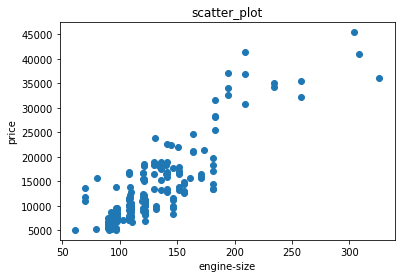

In [16]:
#scatter plot
# engine size vs price
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import pyplot
x=df["engine-size"]
y=df["price"]
plt.scatter(x,y)
plt.title('scatter_plot')
plt.xlabel('engine-size')
plt.ylabel('price')

In [17]:
#grouping for easy data analysis
#here we group on the basis of average high price for each manufacturing module and its corresponing drive-wheels.

df_test = df[['make','drive-wheels','price']]
df_grp = df_test.groupby(['make','drive-wheels'], as_index=False).mean()
print(df_grp)


             make drive-wheels         price
0     alfa-romero          rwd  15498.333333
1            audi          4wd  17450.000000
2            audi          fwd  17941.000000
3             bmw          rwd  26118.750000
4       chevrolet          fwd   6007.000000
5           dodge          fwd   7875.444444
6           honda          fwd   8184.692308
7           isuzu          rwd   8916.500000
8          jaguar          rwd  34600.000000
9           mazda          fwd   8399.545455
10          mazda          rwd  14784.000000
11  mercedes-benz          rwd  33647.000000
12        mercury          rwd  16503.000000
13     mitsubishi          fwd   9239.769231
14         nissan          fwd   8812.333333
15         nissan          rwd  18432.333333
16         peugot          rwd  15489.090909
17       plymouth          fwd   7163.333333
18       plymouth          rwd  12764.000000
19        porsche          rwd  31400.500000
20        renault          fwd   9595.000000
21        

In [18]:
# pivot diagram for easy data analysis
df_pivot = df_grp.pivot(index='drive-wheels', columns='make')
df_pivot.head()

price                                            \
make           alfa-romero     audi       bmw chevrolet        dodge   
drive-wheels                                                           
4wd                    NaN  17450.0       NaN       NaN          NaN   
fwd                    NaN  17941.0       NaN    6007.0  7875.444444   
rwd           15498.333333      NaN  26118.75       NaN          NaN   

                                                                        ...  \
make                honda   isuzu   jaguar         mazda mercedes-benz  ...   
drive-wheels                                                            ...   
4wd                   NaN     NaN      NaN           NaN           NaN  ...   
fwd           8184.692308     NaN      NaN   8399.545455           NaN  ...   
rwd                   NaN  8916.5  34600.0  14784.000000       33647.0  ...   

                                                                         \
make                nissan        peugot      plymouth  porsche renault   
drive-wheels                                                              
4wd                    NaN           NaN           NaN      NaN     NaN   
fwd            8812.333333           NaN   7163.333333      NaN  9595.0   
rwd           18432.333333  15489.090909  12764.000000  31400.5     NaN   

                                                                           
make                  saab       subaru   toyota volkswagen         volvo  
drive-wheels                                                               
4wd                    NaN  9560.400000   8338.0        NaN           NaN  
fwd           15223.333333  7813.285714   8253.0    10077.5           NaN  
rwd                    NaN          NaN  11973.0        NaN  18063.181818  

[3 rows x 22 columns]

In [19]:
#counting corresponing column elements
df['make'].value_counts()

toyota           32
nissan           18
mazda            17
honda            13
mitsubishi       13
volkswagen       12
subaru           12
volvo            11
peugot           11
dodge             9
bmw               8
mercedes-benz     8
plymouth          7
audi              6
saab              6
porsche           4
jaguar            3
alfa-romero       3
chevrolet         3
renault           2
isuzu             2
mercury           1
Name: make, dtype: int64

In [20]:
df.dtypes

symboling               int64
normalized-losses       int32
make                   object
num-of-doors           object
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type            object
num-of-cylinders       object
engine-size             int64
fuel-system            object
bore                  float64
stroke                float64
compression-ratio     float64
horsepower              int32
peak-rpm              float64
city-mpg                int64
highway-mpg             int64
price                 float64
city-L/100KM          float64
highway-L/100KM       float64
std                     uint8
turbo                   uint8
diesel                  uint8
gas                     uint8
horsepower-binned    category
dtype: object

In [21]:
#data filtering, accessing to all desired rows for corresponding column element
toyota_list = df.loc[(df['make'] == 'toyota')  & (df['normalized-losses'] == 168)]
toyota_list

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,highway-mpg,price,city-L/100KM,highway-L/100KM,std,turbo,diesel,gas,horsepower-binned
159,1,168,toyota,two,sedan,rwd,front,94.5,0.810668,0.888889,...,29,34,8058.0,8.103448,6.911765,1,0,0,1,high
160,1,168,toyota,two,hatchback,rwd,front,94.5,0.810668,0.888889,...,29,34,8238.0,8.103448,6.911765,1,0,0,1,high
161,1,168,toyota,two,sedan,rwd,front,94.5,0.810668,0.888889,...,26,29,9298.0,9.038462,8.103448,1,0,0,1,high
162,1,168,toyota,two,hatchback,rwd,front,94.5,0.810668,0.888889,...,26,29,9538.0,9.038462,8.103448,1,0,0,1,high


In [22]:
#accessing columns
df_test = df[['drive-wheels','body-style','price']]
df_test

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
...,...,...,...
196,rwd,sedan,16845.0
197,rwd,sedan,19045.0
198,rwd,sedan,21485.0
199,rwd,sedan,22470.0


In [23]:
#calculating correlation coefficient note: if both variables are of type int or float. 
df[['engine-size', 'price']].corr()


,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


In [24]:
df[['bore','stroke','compression-ratio','horsepower','engine-size','highway-mpg','price']].corr()

,bore,stroke,compression-ratio,horsepower,engine-size,highway-mpg,price
bore,1.000000,-0.055390,0.001263,0.566903,0.572609,-0.591309,0.543155
stroke,-0.055390,1.000000,0.187871,0.098128,0.205928,-0.034636,0.082269
compression-ratio,0.001263,0.187871,1.000000,-0.214489,0.028889,0.268465,0.071107
horsepower,0.566903,0.098128,-0.214489,1.000000,0.822668,-0.804579,0.809607
engine-size,0.572609,0.205928,0.028889,0.822668,1.000000,-0.679571,0.872335
highway-mpg,-0.591309,-0.034636,0.268465,-0.804579,-0.679571,1.000000,-0.704692
price,0.543155,0.082269,0.071107,0.809607,0.872335,-0.704692,1.000000


(0, 53294.018108947406)

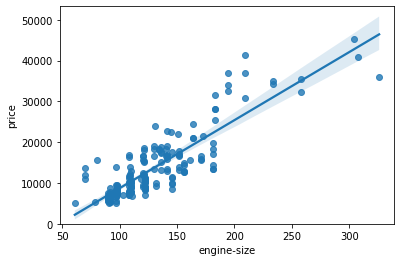

In [25]:
#scatterplot with fitted line
#engine-size vs price
import seaborn as sns
sns.regplot(x='engine-size',y='price', data=df)
plt.ylim(0,)
#it is proved that price is higher for larger engine-size
#there is no value of low prices for larger engine size since the regression line is mostly fitted alongs the dots

             highway-mpg     price
highway-mpg     1.000000 -0.704692
price          -0.704692  1.000000


(0, 48178.021297087296)

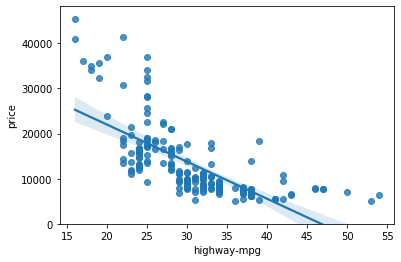

In [26]:
# highway-mpg vs price
import seaborn as sns



print(df[['highway-mpg','price']].corr())
sns.regplot(x='highway-mpg',y='price', data=df)
plt.ylim(0,)
#since the correlation coefficient for these two variables is negative, we see negative trend for price on increasing highway-mpg

          peak-rpm     price
peak-rpm  1.000000 -0.101616
price    -0.101616  1.000000


(0, 47414.11669426048)

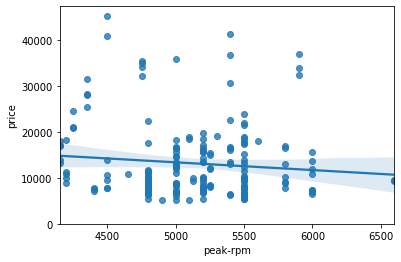

In [27]:
# peak-rpm vs price
import seaborn as sns
print(df[['peak-rpm','price']].corr())
sns.regplot(x='peak-rpm',y='price', data=df)
plt.ylim(0,)
#since the regresion line is more close to horizontal, there is no much realtion on peak-rpm and the price
#we cannot predict the price with peak-rpm

          stroke     price
stroke  1.000000  0.082269
price   0.082269  1.000000


(0, 47414.10667770421)

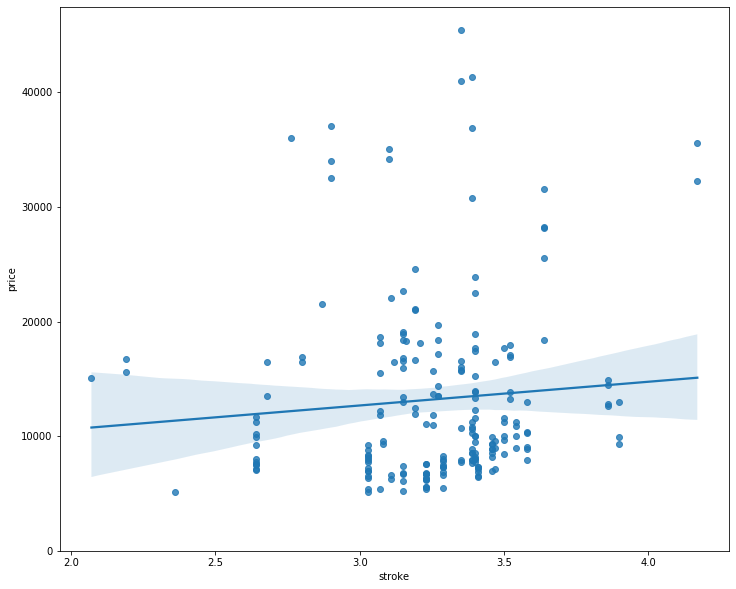

In [28]:
import seaborn as sns
width = 12
height = 10
plt.figure(figsize=(width, height))

print(df[['stroke','price']].corr())
sns.regplot(x='stroke',y='price',data=df)
plt.ylim(0,)
#price is still unpredectible on comparing these two variables.

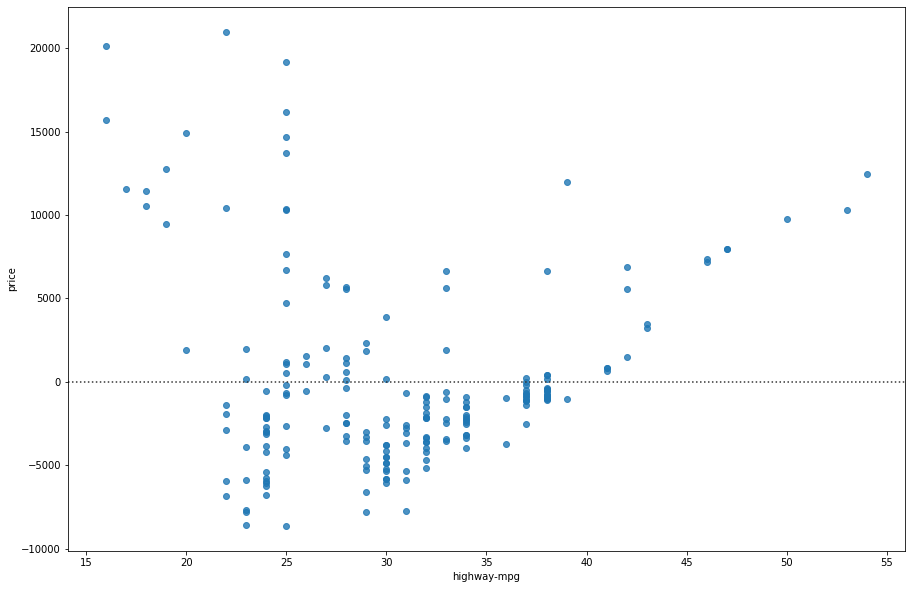

In [29]:
#residual plot
#difference between the observed value and the predicted value(Y vs Y_predicted) is called the residual

width = 15
height = 10
plt.figure(figsize=(width,height))
sns.residplot(df['highway-mpg'],df['price'])
plt.show()

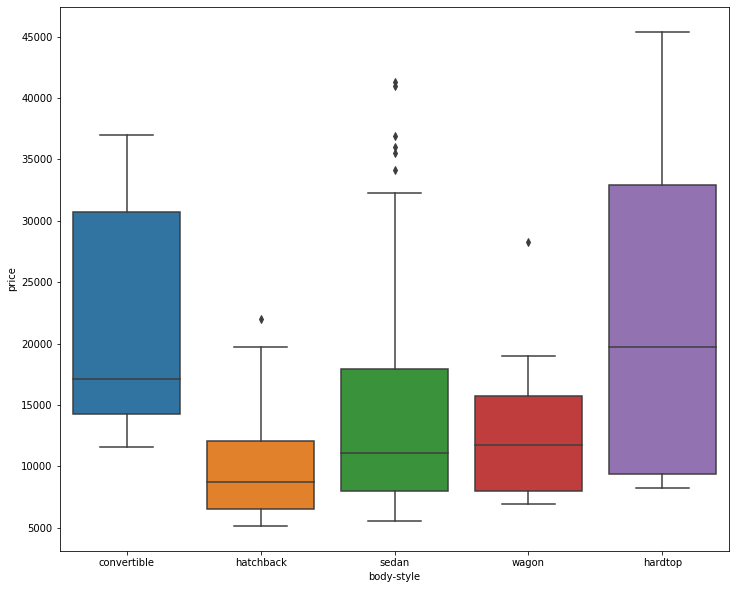

In [30]:
import seaborn as sns
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.boxplot(x="body-style", y="price", data=df)

# Basic Data Analysis and Model developement

In [31]:
#DESCRIPTIVE STATISTICAL ALALYSIS
#---THE COUNT OF THE VARIABLE
#--- THE MEAN
#--- THE STANDARD DEVIATION
#---- THE MINIMUM VALUE
#----- THE IQR(INTER QUARTILE RANGE: 25%, 50%, 75%)
#--- THE MAXIMUM VALUE

In [32]:
#it displays all of the basic statistical analyis of each columns in dataframe( only for type "int" or "float")
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100KM,highway-L/100KM,std,turbo,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330692,3.256874,...,5117.665368,25.179104,30.686567,13207.129353,9.944145,8.044957,0.820896,0.179104,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,...,478.113805,6.423220,6.815150,7947.066342,2.534599,1.840739,0.384397,0.384397,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,...,4150.000000,13.000000,16.000000,5118.000000,4.795918,4.351852,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,...,4800.000000,19.000000,25.000000,7775.000000,7.833333,6.911765,1.000000,0.000000,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,...,5125.369458,24.000000,30.000000,10295.000000,9.791667,7.833333,1.000000,0.000000,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,...,5500.000000,30.000000,34.000000,16500.000000,12.368421,9.400000,1.000000,0.000000,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,...,6600.000000,49.000000,54.000000,45400.000000,18.076923,14.687500,1.000000,1.000000,1.000000,1.000000


In [33]:
#we can apply the method describe on type "object" as follow:
df.describe(include=['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8
top,toyota,four,sedan,fwd,front,ohc,four,mpfi
freq,32,115,94,118,198,145,157,92


In [34]:
#counts the specific column and tabulate it
df['body-style'].value_counts().to_frame()

,body-style
sedan,94
hatchback,68
wagon,25
hardtop,8
convertible,6


In [35]:
#Pearson Correlation Coefficient and P-value of 'wheel-base' and 'price'.
from scipy import stats
print(stats.pearsonr(df['length'], df['price']))
 

(0.6906283804483642, 8.016477466158759e-30)


In [36]:
#Pearson Correlation Coefficient and P-value of 'horsepower' and 'price'.
print(stats.pearsonr(df['horsepower'], df['price']))


(0.8096068016571054, 6.273536270650504e-48)


In [37]:
#Pearson Correlation Coefficient and P-value of 'length' and 'price'.
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.6906283804483642  with a P-value of P =  8.016477466158759e-30


In [38]:
#ANOVA, analysis of variance
#first we group the variables that we are willing to compare with.
#here we compare drive-wheels vs price
#grouping creates the average price value for different drive-wheels system and tabulate like below
grouped_test=df[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test.head()

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
2,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
6,fwd,17710.0
7,fwd,18920.0
8,fwd,23875.0
9,rwd,16430.0


In [39]:
# ANOVA
#now we perform ANOVA calculation
#we us the function .f_oneway() from the model stats and obtain F-test score and P-value
f_val, p_val = stats.f_oneway(grouped_test.get_group('fwd')['price'], grouped_test.get_group('rwd')['price'], grouped_test.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)  
#F-score is large positive value and p is close to zero, so we decide that these two variables are highly co-related.
#it is informative to make an observation on estimating price on the basic of drive-wheel system of the car

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


In [40]:
#now we imply seperately considering 2 variables each time.
f_val, p_val = stats.f_oneway(grouped_test.get_group('fwd')['price'], grouped_test.get_group('rwd')['price'])
print("ANOVA results: F =", f_val, ", p =", p_val)

ANOVA results: F = 130.5533160959111 , p = 2.2355306355677845e-23


In [41]:
#now we imply seperately considering 2 variables each time.
f_val, p_val = stats.f_oneway(grouped_test.get_group('rwd')['price'], grouped_test.get_group('4wd')['price'])
print("ANOVA results: F =", f_val, ", p =", p_val)

ANOVA results: F = 8.580681368924756 , p = 0.004411492211225333


In [42]:
#now we imply seperately considering 2 variables each time.
f_val, p_val = stats.f_oneway(grouped_test.get_group('fwd')['price'], grouped_test.get_group('4wd')['price'])
print("ANOVA results: F =", f_val, ", p =", p_val)

ANOVA results: F = 0.6654657502523033 , p = 0.41620116697845666


In [43]:
#developing model using simple linear regression
#here we consider for predicting the price(price as an dependent variable/ response variable) with highway-mpg(dependent variable or predictor variable)
lm=LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
X = df[['highway-mpg']]
Y = df['price']
lm.fit(X,Y)
lm.score(X,Y)

0.4965911884339175

In [45]:
lm.intercept_

38423.305858157386

In [46]:
lm.coef_

array([-821.73337832])

In [47]:
#the equetion of predicted line 
#from this equation we can predict the price(Y) for all possible value of highway-mpg(X)
Y_predicted1 = -821.7333*X + 38423.3058

In [48]:
lm1 = LinearRegression()
lm1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
X = df[['engine-size']]
Y = df['price']
lm1.fit(X,Y)
lm1.score(X,Y)

0.7609686443622008

In [50]:
lm1.intercept_

-7963.338906281049

In [51]:
lm1.coef_

array([166.86001569])

In [52]:
#the equation of predicted line
#from this equation we can predict the price(Y) for all possible value of engine-size(X)
Y_predicted2 = 166.8600*X + (-7963.33890)

In [53]:
#Multiple linear regression
from sklearn.linear_model import LinearRegression
lm3 = LinearRegression()
lm3


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
X=df[['horsepower','curb-weight','engine-size','highway-mpg','normalized-losses','city-mpg']]
Y=df['price']
lm3.fit(X,Y)
lm3.score(X,Y)

0.8095775973203305

In [55]:
lm3.coef_

array([ 50.5456053 ,   4.76273817,  82.73227641, 100.42560501,
         1.26815157, -74.22186934])

In [56]:
lm3.intercept_

-16055.708688173792

In [57]:
# cross validation for multilinear model
from sklearn.model_selection import cross_val_score
lm_cross_val = LinearRegression()
lm_cross_val

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
R_square_cross = cross_val_score(lm_cross_val, df[['horsepower','curb-weight','engine-size','highway-mpg','normalized-losses','city-mpg']], df["price"], cv=4)
R_square_cross

array([0.83849503, 0.77745487, 0.49418047, 0.46432216])

In [59]:
R_square_cross.mean()

0.6436131357706866

In [60]:
#making prediction first
Y_predicted3 = lm3.predict(X)

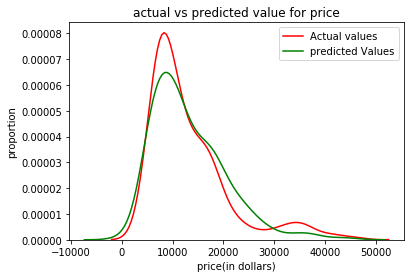

In [61]:
#distribution plot for better visualization of multilinear regression
# for more than 1 predictor variable linear regression model is not used.
#it plots actual Y variable and  predicted Y variable and shows the distribution
import matplotlib.pyplot as plt
#width = 15
#height = 10
#plt.figure(figsize=(width,height))
sns.distplot(df['price'], hist=False, color='r', label='Actual values')
sns.distplot(Y_predicted3, hist=False, color="g", label="predicted Values")
plt.xlabel('price(in dollars)')
plt.ylabel('proportion')
plt.title('actual vs predicted value for price')
plt.show()
plt.close()

In [62]:
#polynomial regression  
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
     
    plt.xlabel('highway-mpg')
    plt.ylabel('Price of Cars')
    
    plt.show()
    plt.close()

In [63]:
x = df['highway-mpg']
y = df['price']
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 5)
p = np.poly1d(f)
print(p)

           5         4        3        2
-0.006998 x + 1.223 x - 84.3 x + 2908 x - 5.152e+04 x + 3.954e+05


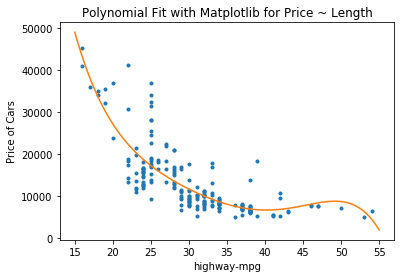

array([-6.99832843e-03,  1.22284271e+00, -8.43003409e+01,  2.90845868e+03,
       -5.15209922e+04,  3.95385040e+05])

In [64]:
PlotPolly(p, x, y, 'highway-mpg')
np.polyfit(x, y, 5)

In [65]:
X = df[['highway-mpg']]
Y = df['price']
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
#calculating R-square value for simple linear regresion model for highway-mpg vs price
lm.score(X,Y)
#We can say that ~ 49.659% of the variation of the price is explained by this simple linear model "horsepower_fit".

0.4965911884339175

In [67]:
#Mean Square Error (MSE)/ for linear regression model
Y_predicted1 = lm.predict(X)


In [68]:
Y_predicted1[0:4]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ])

In [69]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df['price'], Y_predicted1)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639895


In [70]:
#R-square and mean square error for multiple linear regression
#Multiple linear regression
lm3 = LinearRegression()
X3=df[['horsepower','curb-weight','engine-size','highway-mpg','normalized-losses','city-mpg']]
Y3=df['price']
lm3.fit(X3,Y3)
lm.fit(X3,df['price'])
print( 'the R-square for MLR is:', lm.score(X3,df['price']))

the R-square for MLR is: 0.8095775973203305


In [71]:
Y_predict = lm.predict(X3)
print('The mean square error of price and predicted value using multifit is: ', mean_squared_error(df['price'], Y_predict))

The mean square error of price and predicted value using multifit is:  11966458.96533355


In [72]:
#R-Square value for polynimial fit.
from sklearn.metrics import r2_score
r_squared = r2_score(y,p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.6788068173943975


In [73]:
# mean square error for polynimial fit of linear regresion
from sklearn.metrics import mean_squared_error
mean_squared_error(df['price'], p(x))

20184311.223404102

In [74]:
#comparision between r-square values and mean square error values for three different models, 
# linear regression model, multilinear regression model and polynomial fit model
#creating a dataframe df_comparision
import pandas as pd
data = [['linear regression model','0.49','31635042.94'], ['multi-linear regression model','0.80','11966458.96'], ['Polynomial fit','0.67','20474146.42']] 
df_comparision = pd.DataFrame(data, columns = ['model','R-square','MSE'])

df_comparision
# we can see that multi-linear regression model gives the best fit to out data sets, with highest accuracy to the predicted model.

,model,R-square,MSE
0,linear regression model,0.49,31635042.94
1,multi-linear regression model,0.80,11966458.96
2,Polynomial fit,0.67,20474146.42
